In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install regressormetricgraphplot
from regressormetricgraphplot import CompareModels
!pip install scipy


In [ ]:
df = pd.read_csv('/content/yield_df.csv')

In [ ]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


Data Preprocessing

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [ ]:
df.shape

(28242, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
df.duplicated().sum()

2310

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'Boxplot of Pesticides. ')

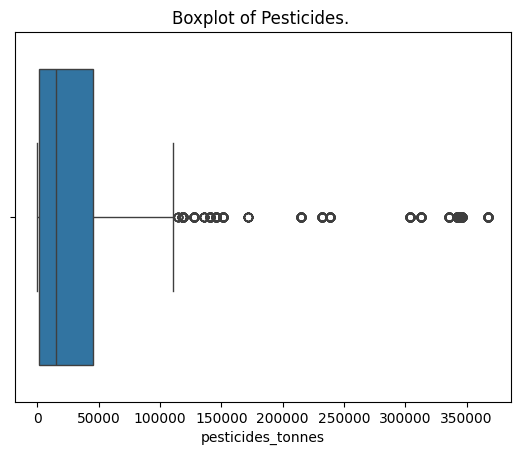

In [ ]:
#boxplot - outlier detection
sns.boxplot(data=df, x=df["pesticides_tonnes"])
plt.title("Boxplot of Pesticides. ")

Text(0.5, 1.0, 'Boxplot of Yield. ')

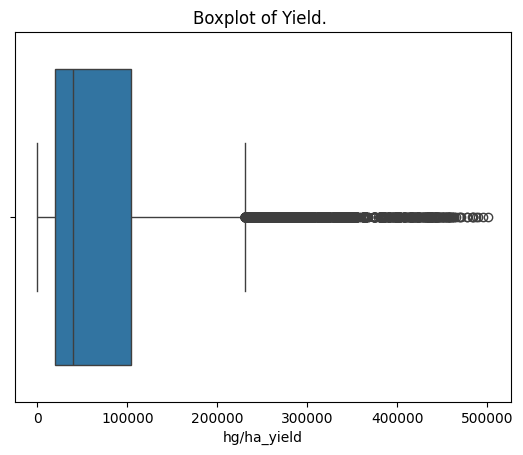

In [ ]:
sns.boxplot(data=df, x=df["hg/ha_yield"])
plt.title("Boxplot of Yield. ")

Text(0.5, 1.0, 'Boxplot of Rainfall. ')

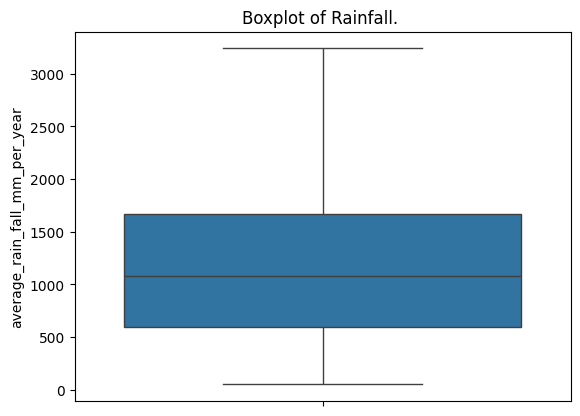

In [ ]:
sns.boxplot(data=df, y=df["average_rain_fall_mm_per_year"])
plt.title("Boxplot of Rainfall. ")

Text(0.5, 1.0, 'Boxplot of Temperature. ')

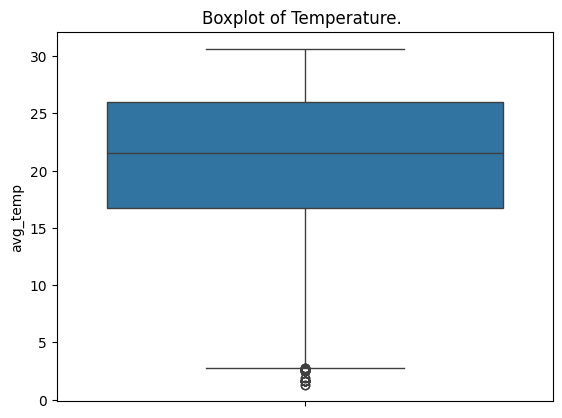

In [ ]:
sns.boxplot(data=df, y=df["avg_temp"])
plt.title("Boxplot of Temperature. ")

Scatter Plot

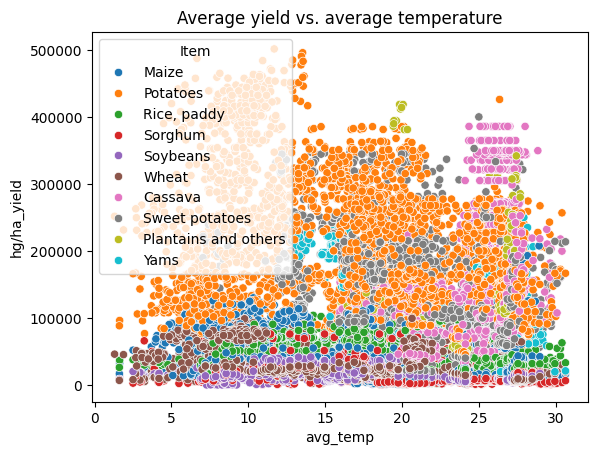

In [ ]:
#Average yield vs. average temperature

import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="avg_temp", y="hg/ha_yield", hue="Item")
_ = plt.title("Average yield vs. average temperature")

<Axes: xlabel='hg/ha_yield', ylabel='pesticides_tonnes'>

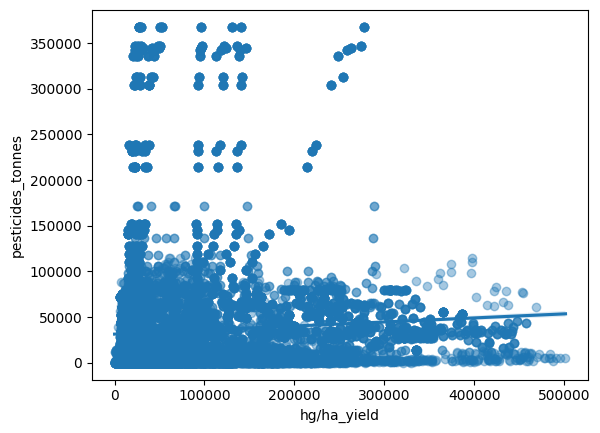

In [ ]:
sns.regplot(x="hg/ha_yield", y= "pesticides_tonnes", data=df, scatter_kws={'alpha': 0.4})

<Axes: xlabel='hg/ha_yield', ylabel='average_rain_fall_mm_per_year'>

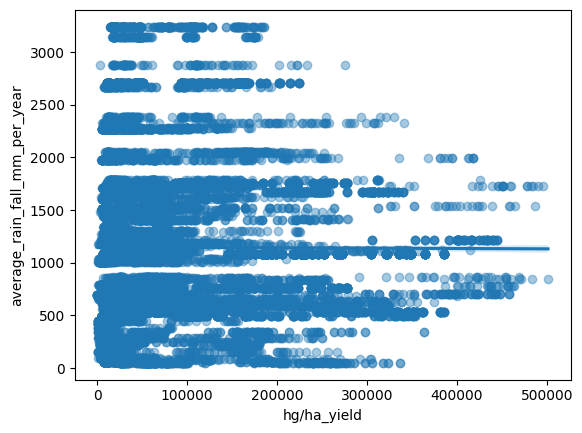

In [ ]:
sns.regplot(x="hg/ha_yield", y= "average_rain_fall_mm_per_year", data=df, scatter_kws={'alpha': 0.4})

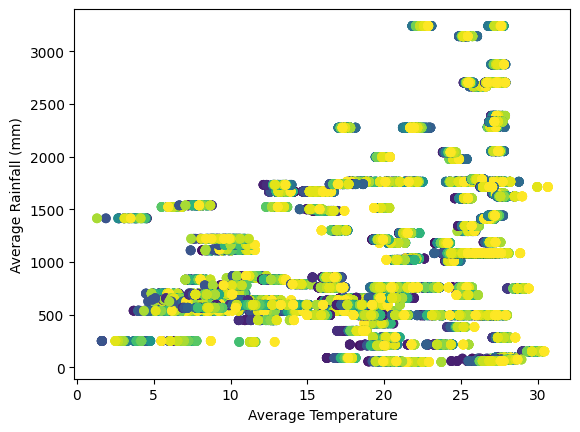

In [ ]:
#  Rainfall vs Temperature
import matplotlib.pyplot as plt
plt.scatter(df['avg_temp'], df['average_rain_fall_mm_per_year'], c=df['Year'], cmap='viridis')
plt.xlabel('Average Temperature')
_ = plt.ylabel('Average Rainfall (mm)')

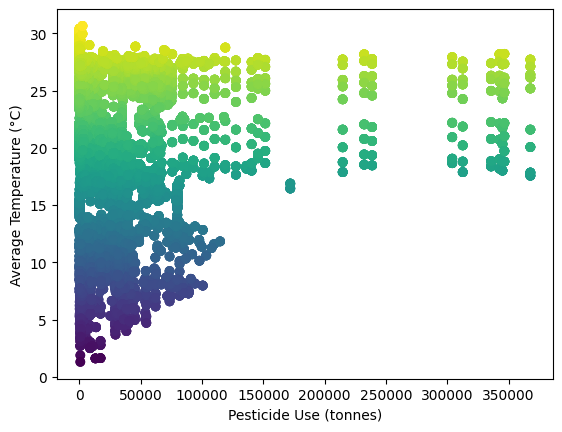

In [ ]:
# Pesticide Use vs Average Temperature

import matplotlib.pyplot as plt
plt.scatter(df['pesticides_tonnes'], df['avg_temp'], c=df['avg_temp'])
plt.xlabel('Pesticide Use (tonnes)')
_ = plt.ylabel('Average Temperature (°C)')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'hg/ha_yield'}>],
       [<Axes: title={'center': 'average_rain_fall_mm_per_year'}>,
        <Axes: title={'center': 'pesticides_tonnes'}>],
       [<Axes: title={'center': 'avg_temp'}>, <Axes: >]], dtype=object)

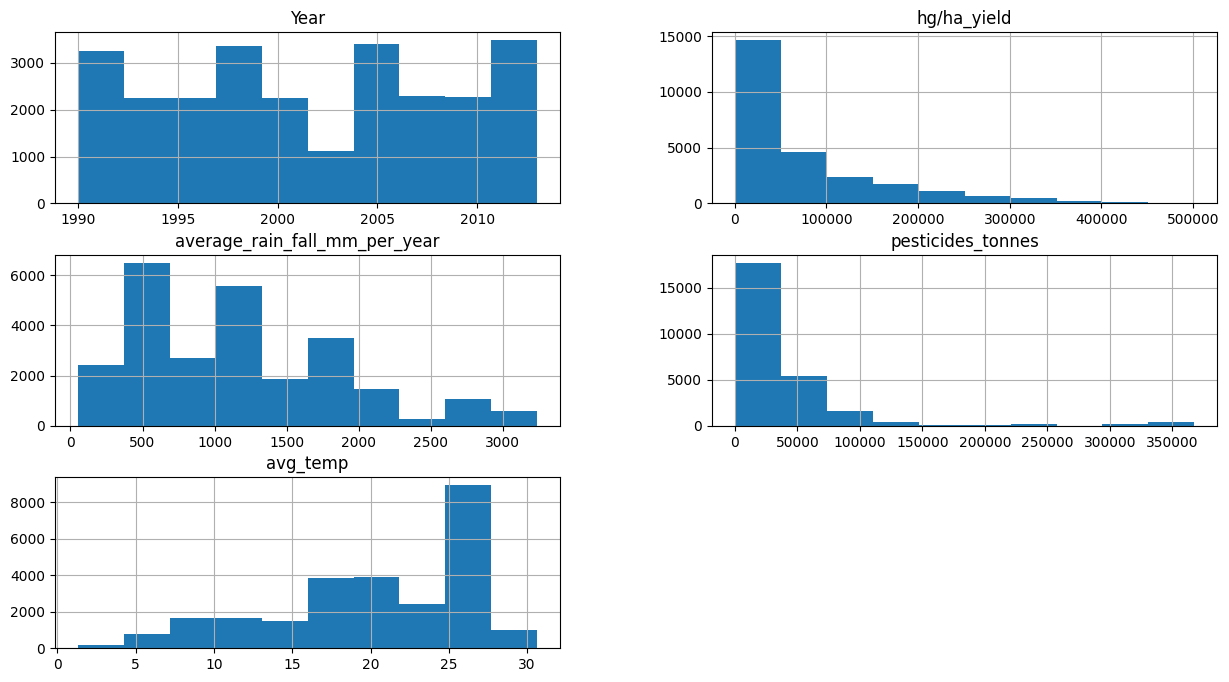

In [ ]:
df.hist(figsize=(15,8))

<ipython-input-21-8f728665719e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df.Area,palette="mako");


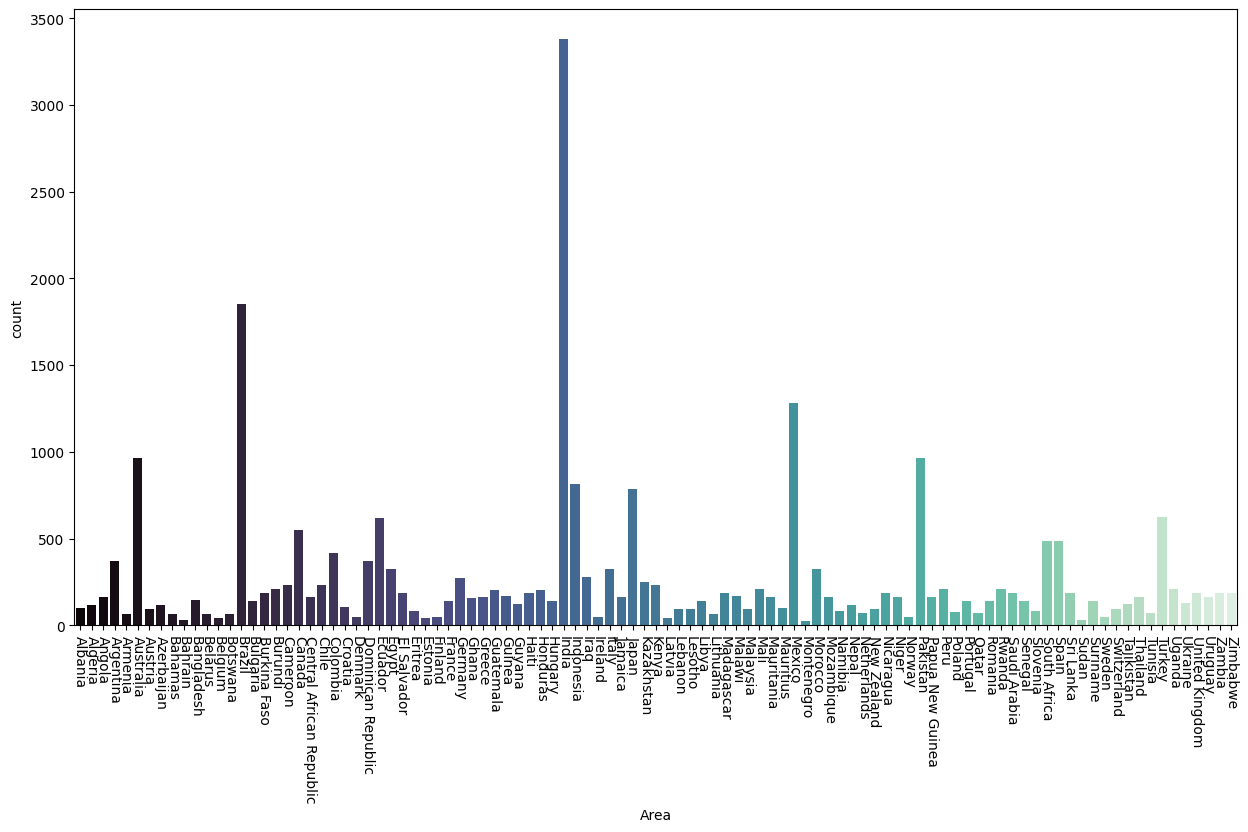

In [ ]:
plt.figure(figsize=(15,8));
sns.countplot(x=df.Area,palette="mako");
plt.xticks(rotation=-90);
plt.show()

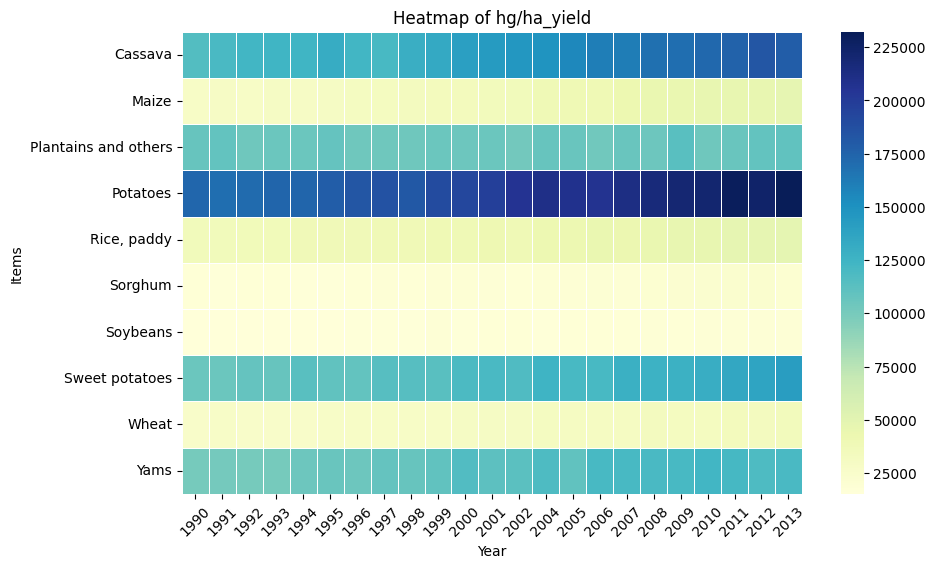

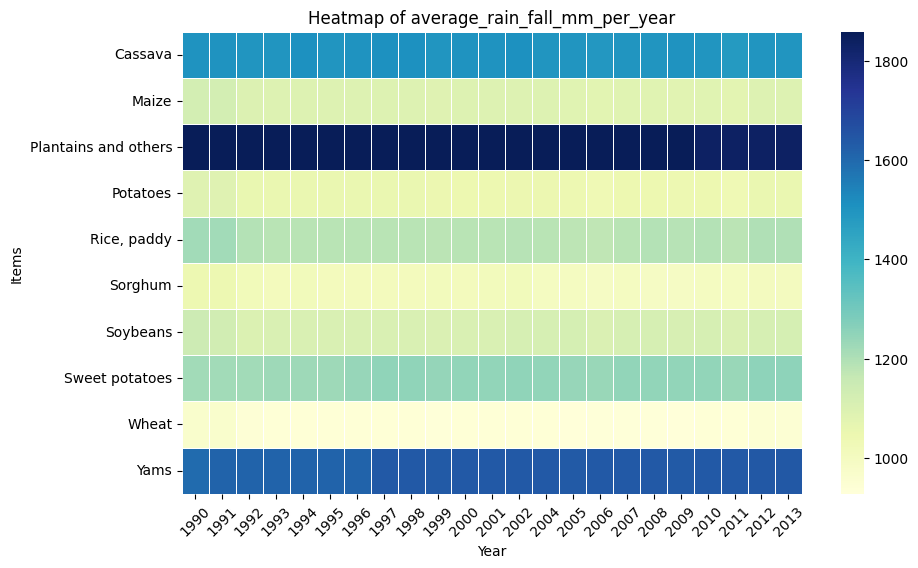

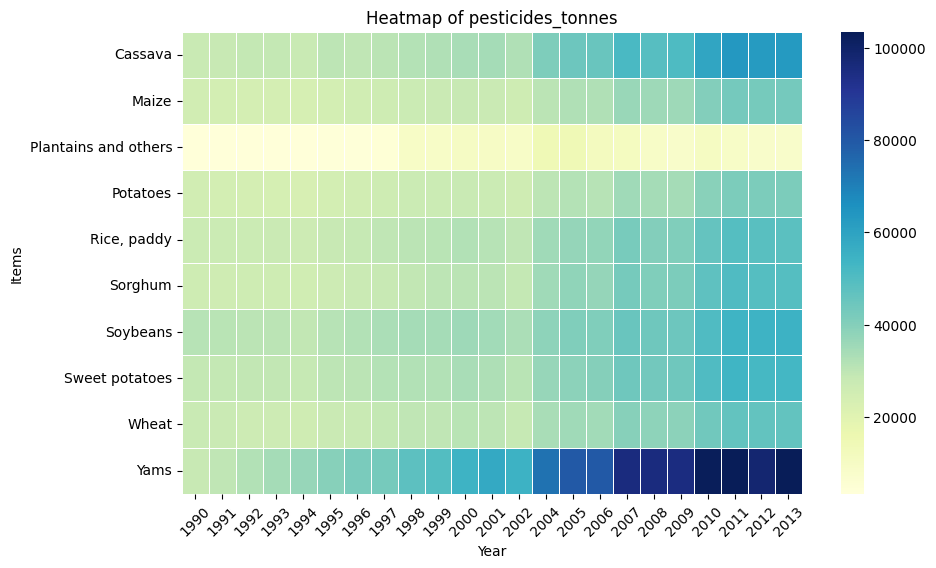

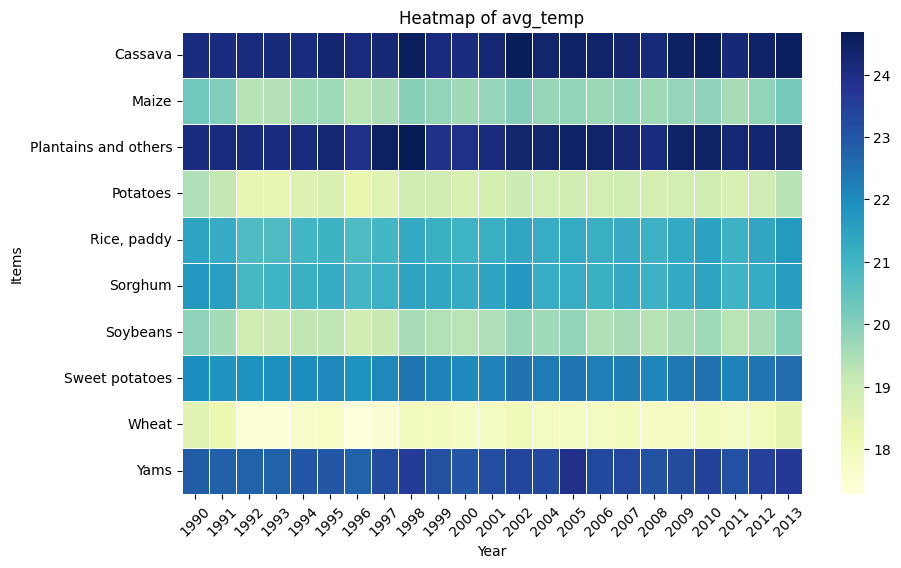

In [ ]:
numerical_columns = ['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']

for column in numerical_columns:
    pivot_table = df.pivot_table(index='Item', columns='Year', values=column)
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot_table, annot=False, cmap='YlGnBu', linewidths=.5)
    plt.title(f"Heatmap of {column}")
    plt.xlabel('Year')
    plt.ylabel('Items')
    plt.xticks(rotation=45)
    plt.show()

## Transforming average_rain_fall_mm_per_year

In [ ]:
def isStr(obj):
    try:
        float(obj)
        return False
    except:
        return True
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isStr)].index

NameError: name 'df' is not defined

In [ ]:
df = df.drop(to_drop)

In [ ]:
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [ ]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

In [ ]:
len(df['Area'].unique())

101

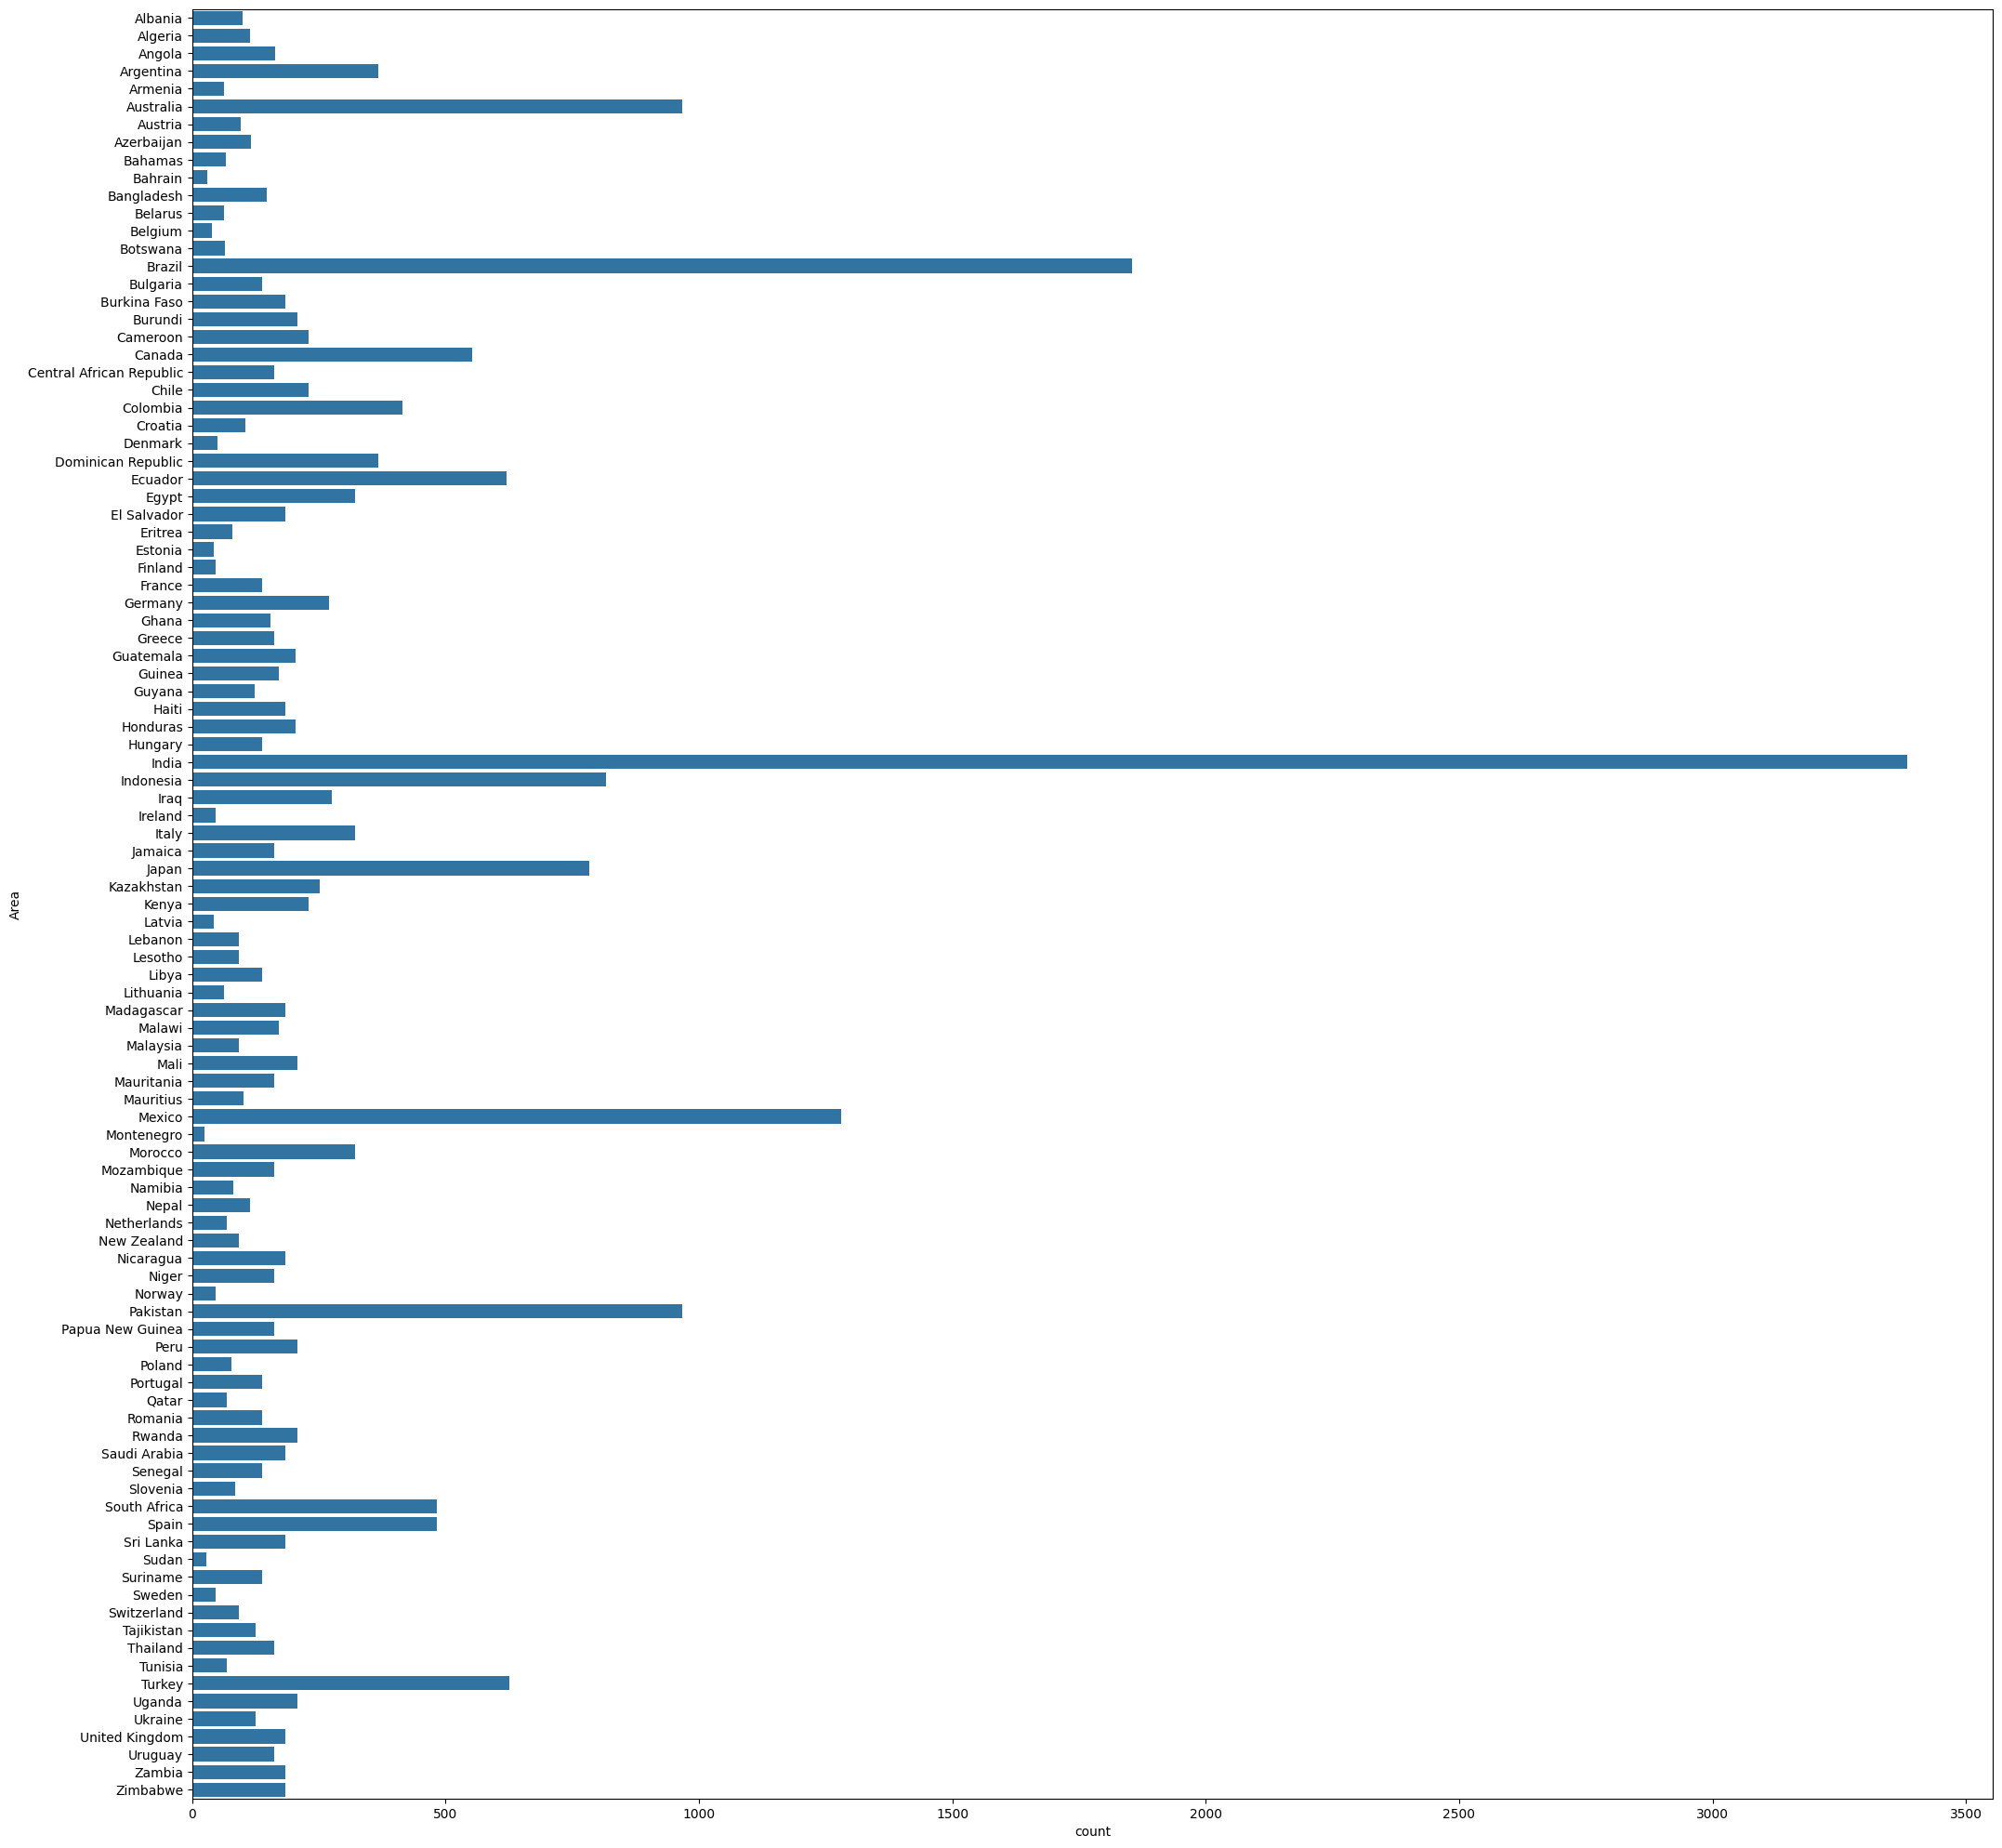

In [ ]:
plt.figure(figsize=(25,25))
sns.countplot(y=df['Area'])
plt.show()

In [ ]:
(df['Area'].value_counts() < 500).sum()

91

# yield_per_country

In [ ]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area']==state]['hg/ha_yield'].sum())

In [ ]:
df['hg/ha_yield'].sum()

1996196943

In [ ]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

# Yield Per Country Graph

<Axes: >

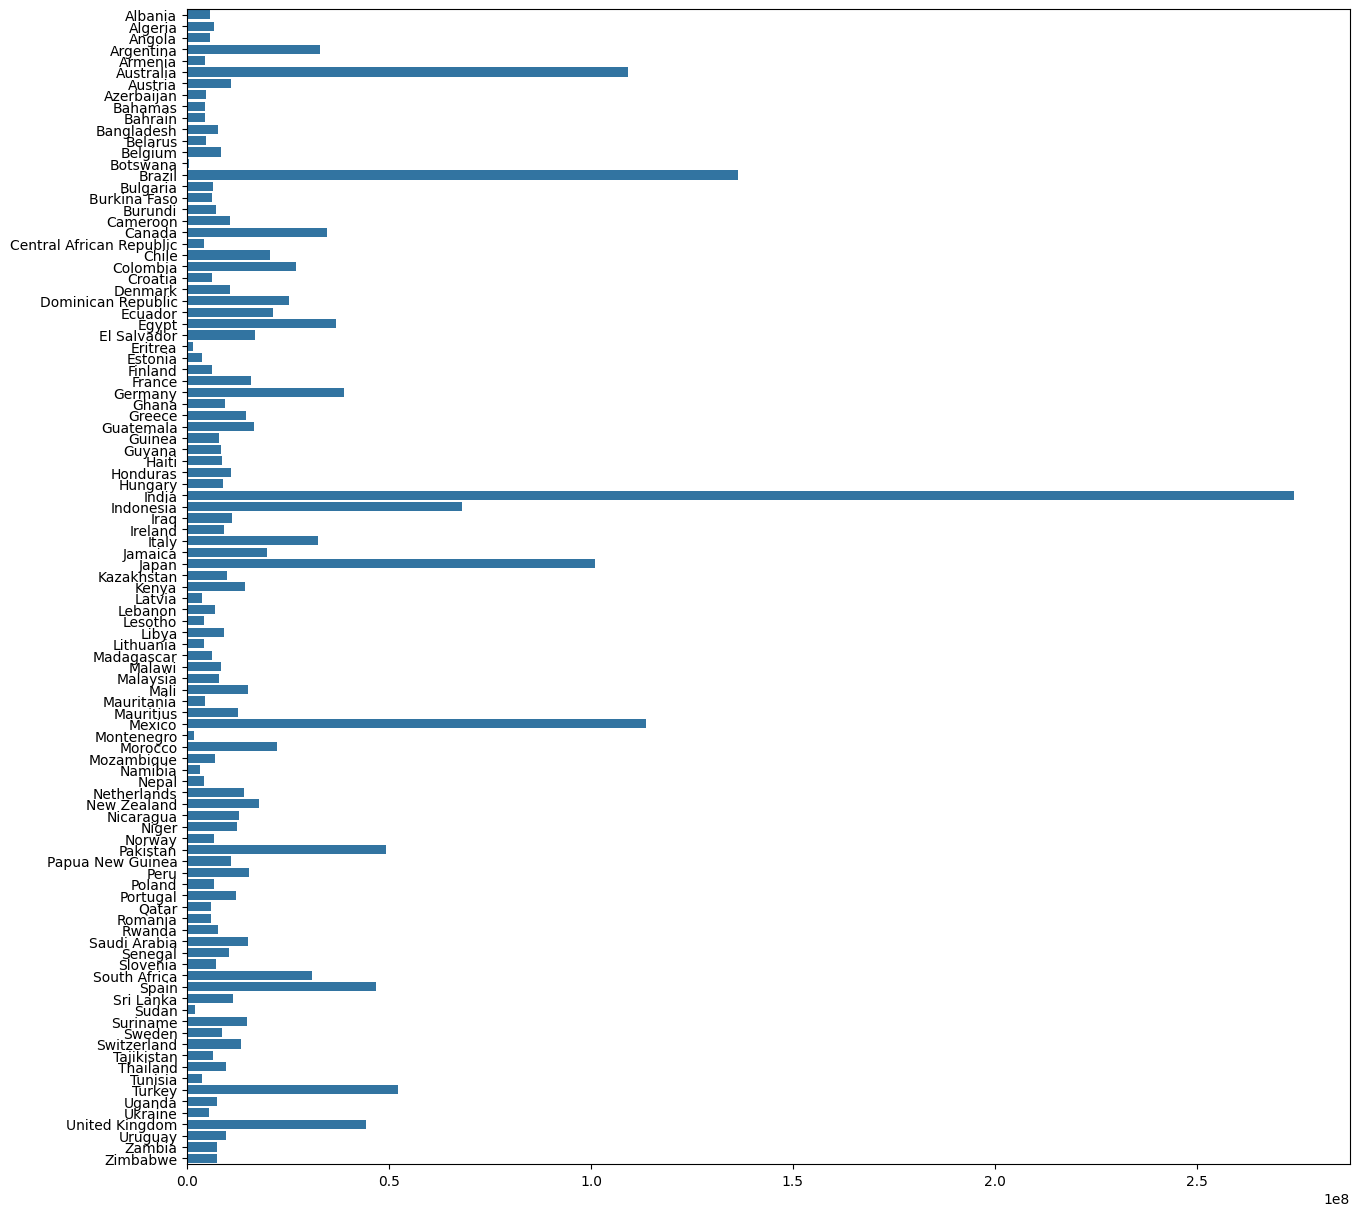

In [ ]:
plt.figure(figsize=(15, 15))
sns.barplot(y=country, x=yield_per_country)

# Graph Frequency vs Item

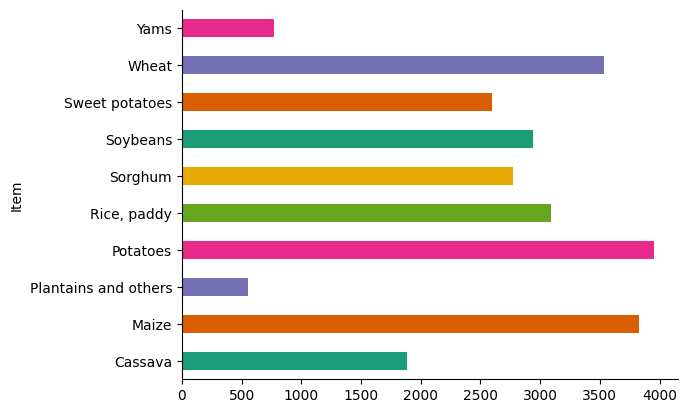

In [ ]:

df.groupby('Item').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Yield vs Item

In [ ]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item']==crop]['hg/ha_yield'].sum())

<Axes: >

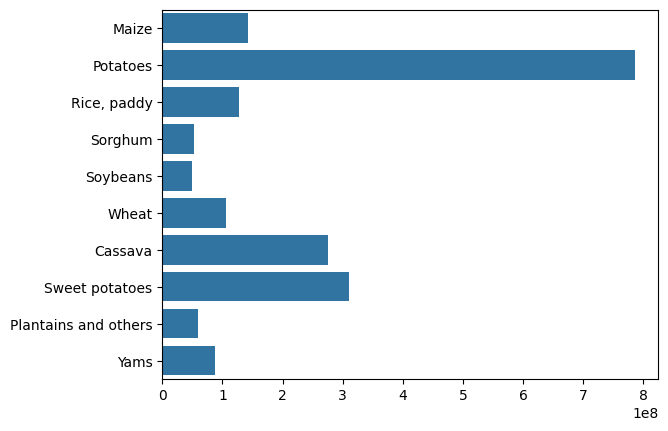

In [ ]:
sns.barplot(y=crops,x=yield_per_crop)

# Train Test split rearranging columns

In [ ]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
df.head(3)

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2, 3]),
            ('OHE', ohe, [4, 5]),
        ],
        remainder='passthrough'
)

In [ ]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [ ]:
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OHE__Area_Algeria', 'OHE__Area_Angola', 'OHE__Area_Argentina',
       'OHE__Area_Armenia', 'OHE__Area_Australia', 'OHE__Area_Austria',
       'OHE__Area_Azerbaijan', 'OHE__Area_Bahamas', 'OHE__Area_Bahrain',
       'OHE__Area_Bangladesh', 'OHE__Area_Belarus', 'OHE__Area_Belgium',
       'OHE__Area_Botswana', 'OHE__Area_Brazil', 'OHE__Area_Bulgaria',
       'OHE__Area_Burkina Faso', 'OHE__Area_Burundi',
       'OHE__Area_Cameroon', 'OHE__Area_Canada',
       'OHE__Area_Central African Republic', 'OHE__Area_Chile',
       'OHE__Area_Colombia', 'OHE__Area_Croatia', 'OHE__Area_Denmark',
       'OHE__Area_Dominican Republic', 'OHE__Area_Ecuador',
       'OHE__Area_Egypt', 'OHE__Area_El Salvador', 'OHE__Area_Eritrea',
       'OHE__Area_Estonia', 'OHE__Area_Finland', 'OHE__Area_France',
       'OHE__Area_Germany', 'OHE__Area_Ghana',

# ML Models :
# 1. Linear Regression

 R (Pearson Coefficient ) : [[1.         0.86451514]
 [0.86451514 1.        ]] 
 R2 Score : 0.747312327961836 
 Root Mean Squared Error : 42630.324526694 
 Mean Absolute Error : 29907.491754632363 
 Mean Absolute Percentage Error :0.9117460796283101  


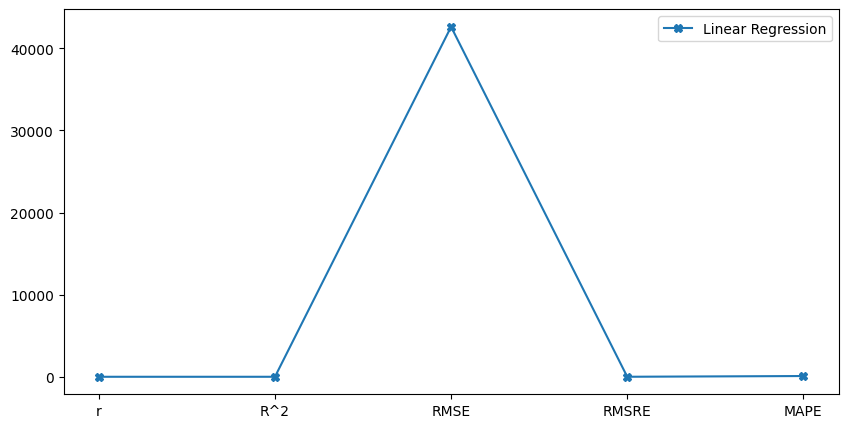

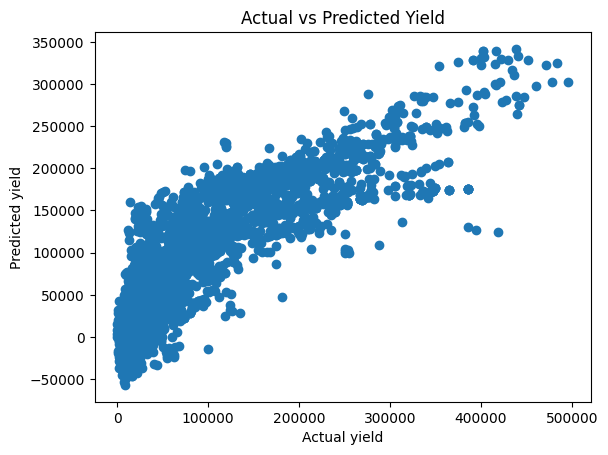

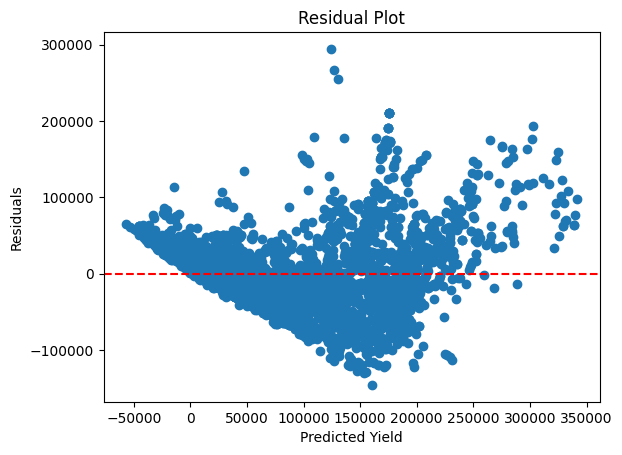

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error
from math import sqrt
def root_mean_squared_error(y_test,y_pred):
  rmse = sqrt(mean_squared_error(y_test, y_pred))
  return rmse
def r_coeff(y_test,y_pred):
  r= np.corrcoef(y_test, y_pred)
  return r
plot = CompareModels()
linear_reg = LinearRegression()
linear_reg.fit(X_train_dummy,y_train)
y_pred = linear_reg.predict(X_test_dummy)


print(f" R (Pearson Coefficient ) : { r_coeff(y_test,y_pred)} \n R2 Score : {r2_score(y_test,y_pred)} \n Root Mean Squared Error : {root_mean_squared_error(y_test,y_pred)} \n Mean Absolute Error : {mean_absolute_error(y_test,y_pred)} \n Mean Absolute Percentage Error :{mean_absolute_percentage_error(y_test,y_pred)}  ")
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot.add(model_name= 'Linear Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))
print("\n")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual yield')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.show()
print("\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 2. Gradient Boosting Regressor


 R (Pearson Coefficient ) : [[1.         0.97676114]
 [0.97676114 1.        ]] 
 R2 Score : 0.9533181810670842 
 Root Mean Squared Error : 18323.16516975166 
 Mean Absolute Error : 10837.581316159703 
 Mean Absolute Percentage Error :0.34207906816599815  


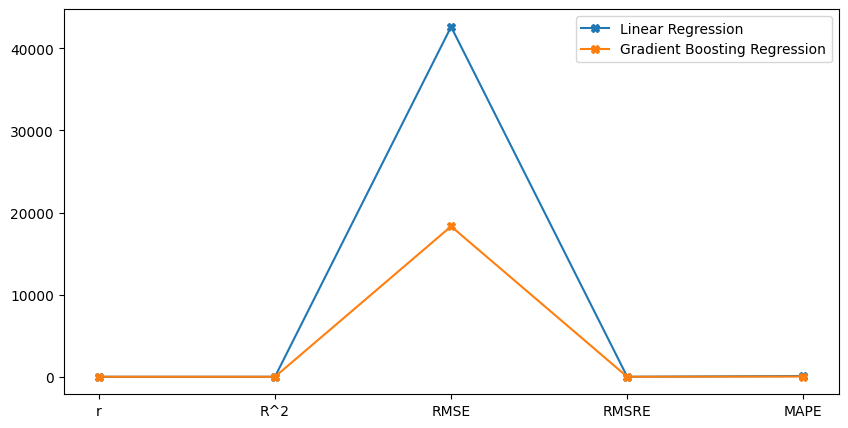

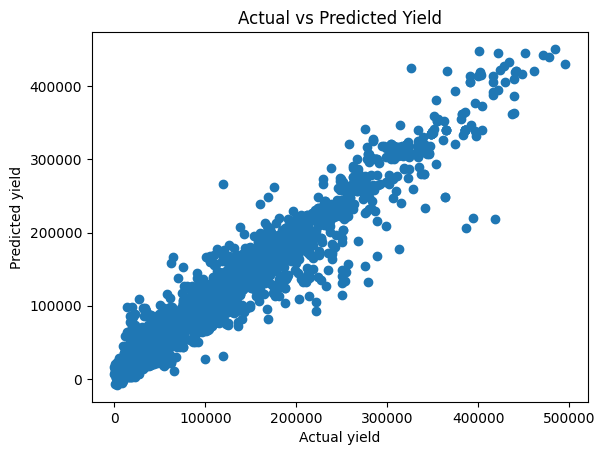

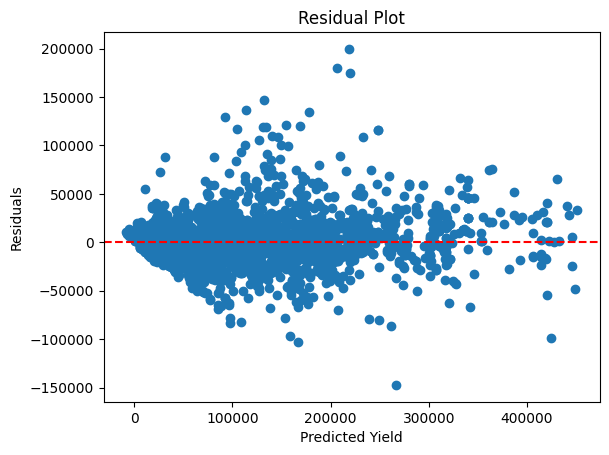

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
gb = HistGradientBoostingRegressor()
gb.fit(X_train_dummy.toarray(),y_train)
y_pred = gb.predict(X_test_dummy.toarray())


print(f" R (Pearson Coefficient ) : {r_coeff(y_test,y_pred)} \n R2 Score : {r2_score(y_test,y_pred)} \n Root Mean Squared Error : {root_mean_squared_error(y_test,y_pred)} \n Mean Absolute Error : {mean_absolute_error(y_test,y_pred)} \n Mean Absolute Percentage Error :{mean_absolute_percentage_error(y_test,y_pred)}  ")
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot.add(model_name= 'Gradient Boosting Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))
print("\n")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual yield')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.show()
print("\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 3. Ridge Regression

 R (Pearson Coefficient ) : [[1.         0.86449494]
 [0.86449494 1.        ]] 
 R2 Score : 0.7473042337448462 
 Root Mean Squared Error : 42631.00729908857 
 Mean Absolute Error : 29864.88758307408 
 Mean Absolute Percentage Error :0.9078287218818285  


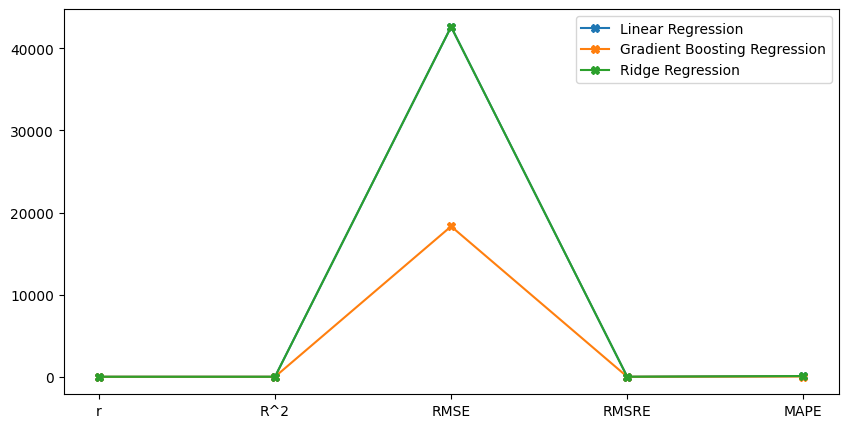

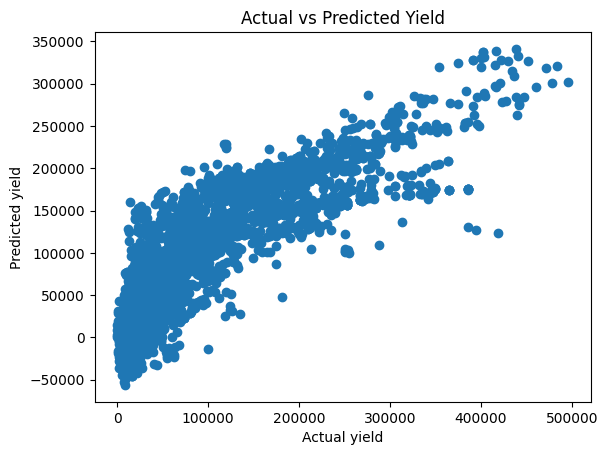

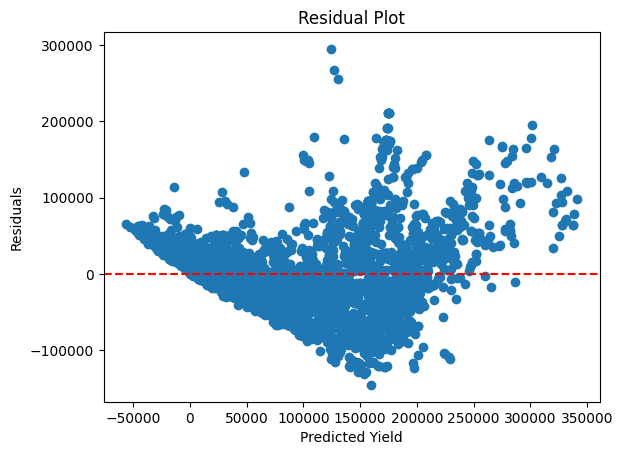

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train_dummy,y_train)
y_pred = ridge_reg.predict(X_test_dummy)


print(f" R (Pearson Coefficient ) : { r_coeff(y_test,y_pred)} \n R2 Score : {r2_score(y_test,y_pred)} \n Root Mean Squared Error : {root_mean_squared_error(y_test,y_pred)} \n Mean Absolute Error : {mean_absolute_error(y_test,y_pred)} \n Mean Absolute Percentage Error :{mean_absolute_percentage_error(y_test,y_pred)}  ")
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot.add(model_name= 'Ridge Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))
print("\n")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual yield')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.show()
print("\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 4.Lasso Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(


 R (Pearson Coefficient ) : [[1.         0.86451789]
 [0.86451789 1.        ]] 
 R2 Score : 0.7473261756207235 
 Root Mean Squared Error : 42629.156408211 
 Mean Absolute Error : 29893.99762450549 
 Mean Absolute Percentage Error :0.9094421813124439  


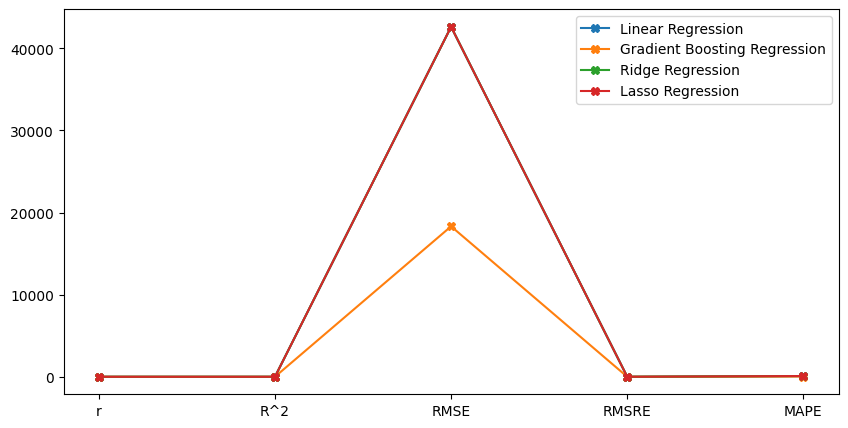

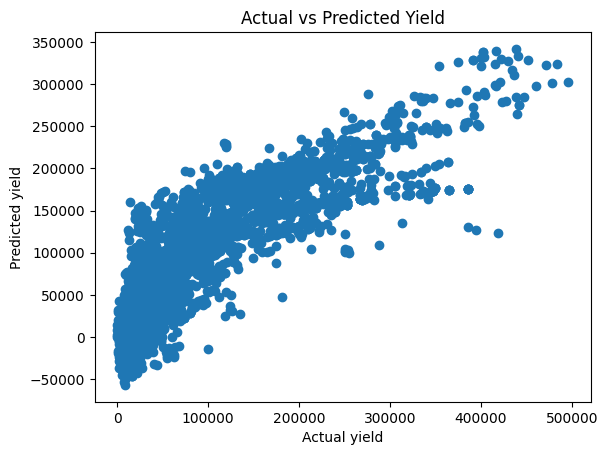

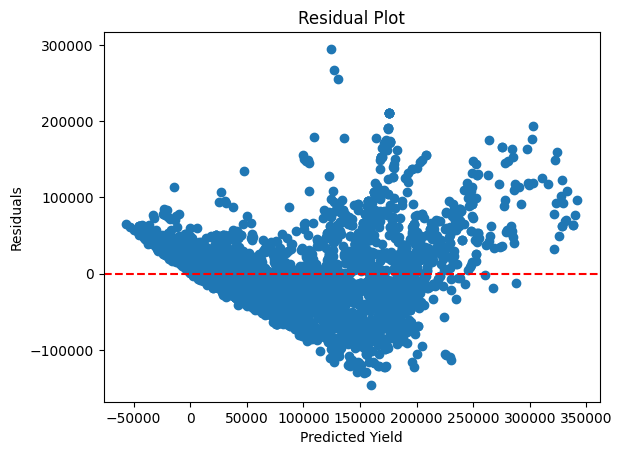

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train_dummy,y_train)
y_pred = lasso_reg.predict(X_test_dummy)


print(f" R (Pearson Coefficient ) : { r_coeff(y_test,y_pred)} \n R2 Score : {r2_score(y_test,y_pred)} \n Root Mean Squared Error : {root_mean_squared_error(y_test,y_pred)} \n Mean Absolute Error : {mean_absolute_error(y_test,y_pred)} \n Mean Absolute Percentage Error :{mean_absolute_percentage_error(y_test,y_pred)}  ")
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot.add(model_name= 'Lasso Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))
print("\n")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual yield')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.show()
print("\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 5. K Neighbours Regression

 R (Pearson Coefficient ) : [[1.         0.99243046]
 [0.99243046 1.        ]] 
 R2 Score : 0.9849021762487353 
 Root Mean Squared Error : 10420.385530907171 
 Mean Absolute Error : 4620.037285521496 
 Mean Absolute Percentage Error :0.10057406605524502  


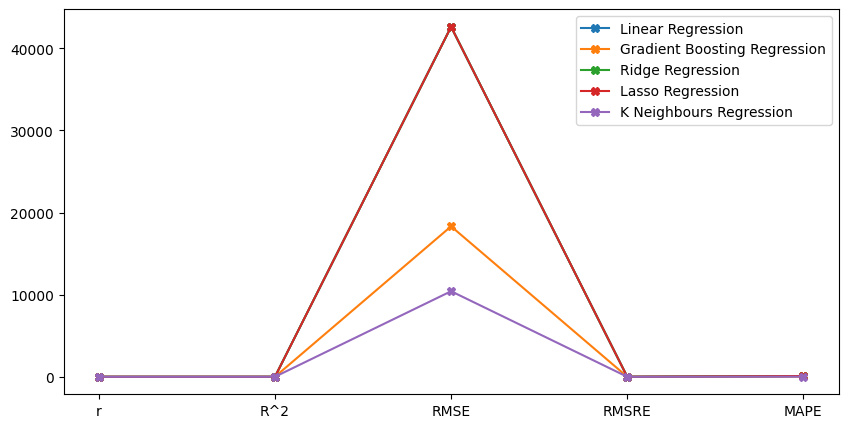

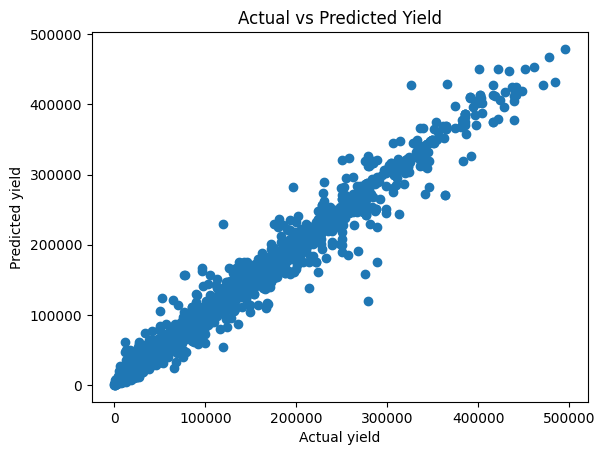

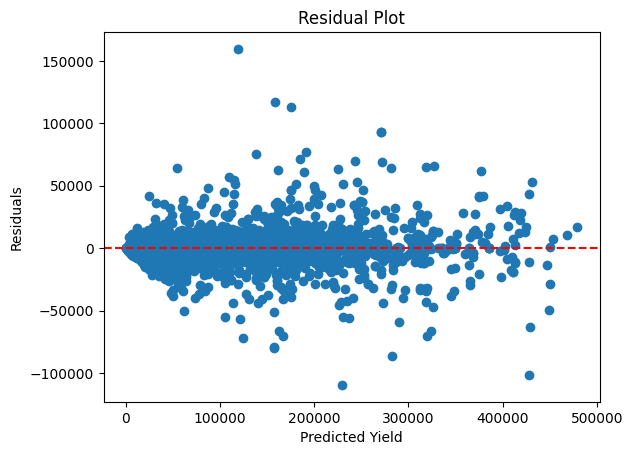

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn_reg = KNeighborsRegressor()
kn_reg.fit(X_train_dummy,y_train)
y_pred = kn_reg.predict(X_test_dummy)
print(f" R (Pearson Coefficient ) : { r_coeff(y_test,y_pred)} \n R2 Score : {r2_score(y_test,y_pred)} \n Root Mean Squared Error : {root_mean_squared_error(y_test,y_pred)} \n Mean Absolute Error : {mean_absolute_error(y_test,y_pred)} \n Mean Absolute Percentage Error :{mean_absolute_percentage_error(y_test,y_pred)}  ")
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot.add(model_name= 'K Neighbours Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))
print("\n")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual yield')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.show()
print("\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 6.Decision Tree Regression

 R (Pearson Coefficient ) : [[1.         0.98976682]
 [0.98976682 1.        ]] 
 R2 Score : 0.9795587859983795 
 Root Mean Squared Error : 12124.94993528229 
 Mean Absolute Error : 3926.90649701176 
 Mean Absolute Percentage Error :0.08413478737784882  


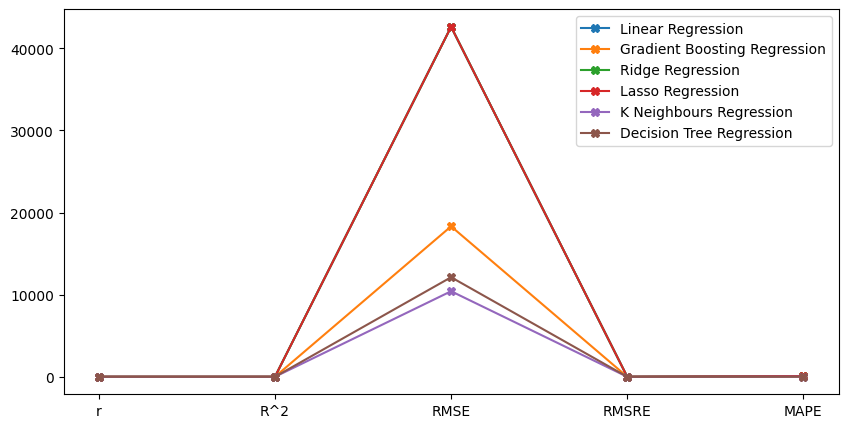

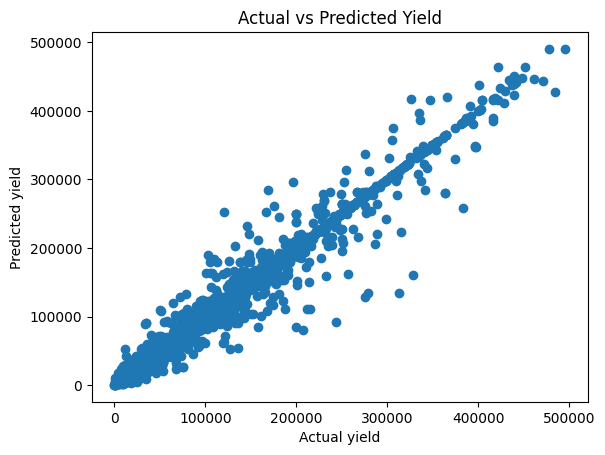

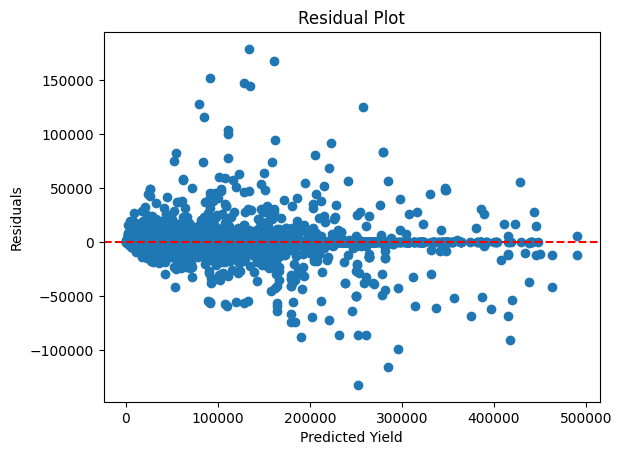

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train_dummy,y_train)
y_pred = dt_reg.predict(X_test_dummy)


print(f" R (Pearson Coefficient ) : { r_coeff(y_test,y_pred)} \n R2 Score : {r2_score(y_test,y_pred)} \n Root Mean Squared Error : {root_mean_squared_error(y_test,y_pred)} \n Mean Absolute Error : {mean_absolute_error(y_test,y_pred)} \n Mean Absolute Percentage Error :{mean_absolute_percentage_error(y_test,y_pred)}  ")
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot.add(model_name= 'Decision Tree Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))
print("\n")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual yield')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.show()
print("\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 7.Random Forest Regression

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


 R (Pearson Coefficient ) : [[1.         0.99306713]
 [0.99306713 1.        ]] 
 R2 Score : 0.98616207092107 
 Root Mean Squared Error : 9976.131423430012 
 Mean Absolute Error : 3991.2773857721227 
 Mean Absolute Percentage Error :0.09420083802563672  


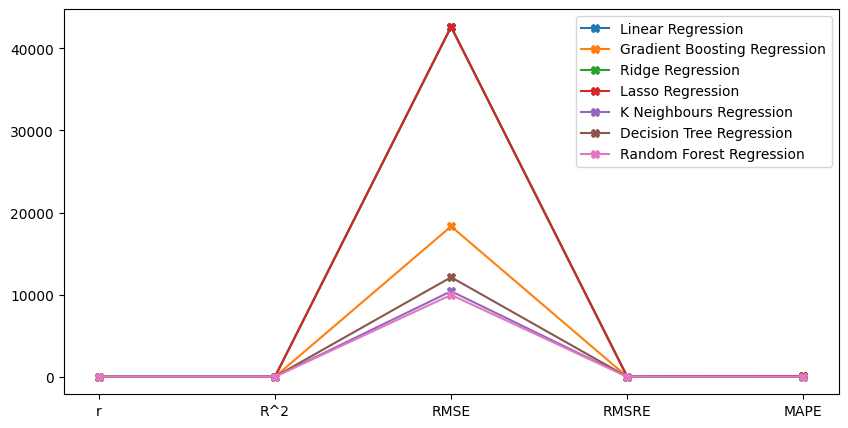

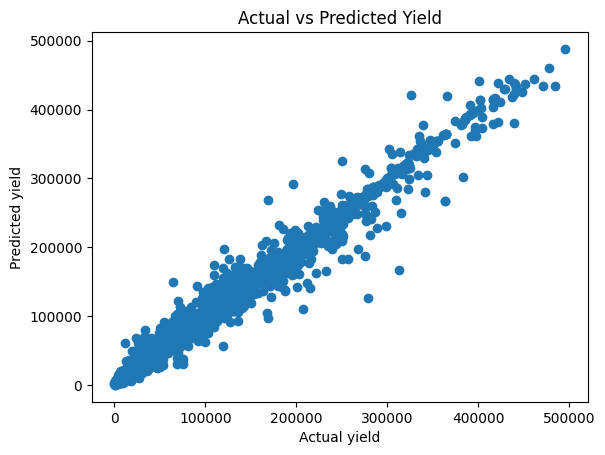

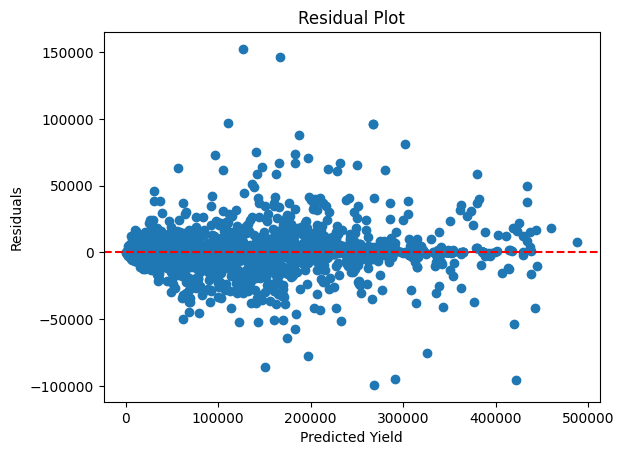

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rf_reg.fit(X_train_dummy,y_train)
y_pred = rf_reg.predict(X_test_dummy)


print(f" R (Pearson Coefficient ) : { r_coeff(y_test,y_pred)} \n R2 Score : {r2_score(y_test,y_pred)} \n Root Mean Squared Error : {root_mean_squared_error(y_test,y_pred)} \n Mean Absolute Error : {mean_absolute_error(y_test,y_pred)} \n Mean Absolute Percentage Error :{mean_absolute_percentage_error(y_test,y_pred)}  ")
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot.add(model_name= 'Random Forest Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))
print("\n")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual yield')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.show()
print("\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# 8. Support Vector Regression

 R (Pearson Coefficient ) : [[1.         0.55635755]
 [0.55635755 1.        ]] 
 R2 Score : -0.2058354793077959 
 Root Mean Squared Error : 93125.93379849613 
 Mean Absolute Error : 57810.26900931254 
 Mean Absolute Percentage Error :1.3791109278814748  


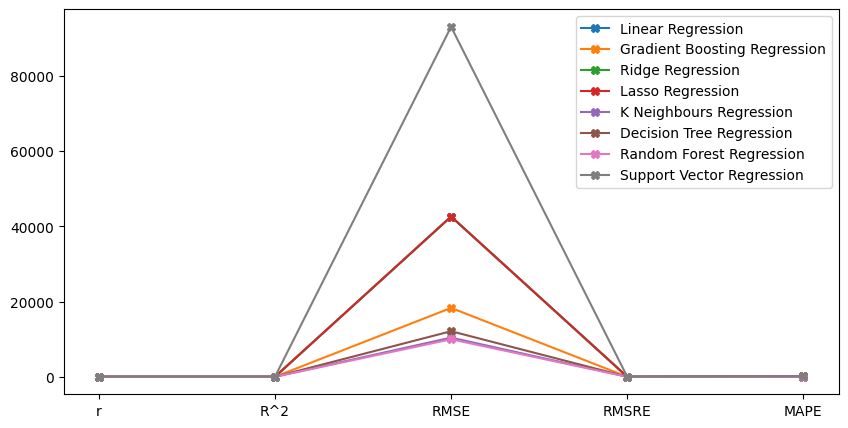

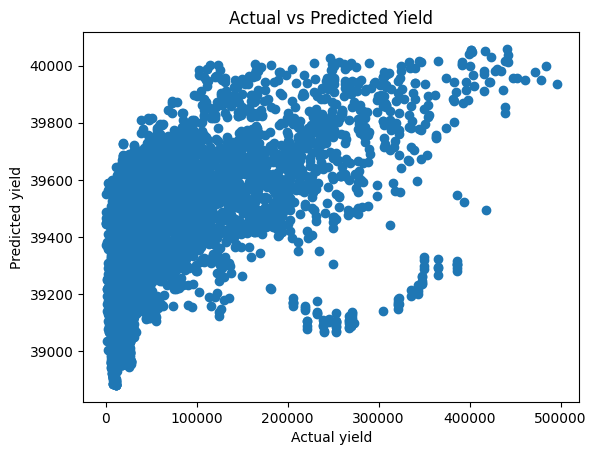

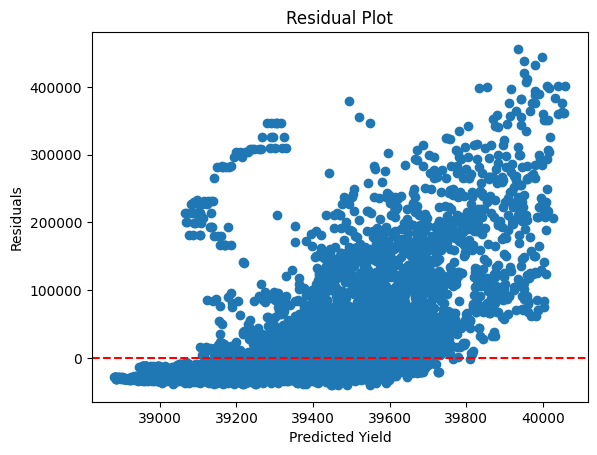

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train_dummy,y_train)
y_pred = svr.predict(X_test_dummy)


print(f" R (Pearson Coefficient ) : { r_coeff(y_test,y_pred)} \n R2 Score : {r2_score(y_test,y_pred)} \n Root Mean Squared Error : {root_mean_squared_error(y_test,y_pred)} \n Mean Absolute Error : {mean_absolute_error(y_test,y_pred)} \n Mean Absolute Percentage Error :{mean_absolute_percentage_error(y_test,y_pred)}  ")
CompareModels.R2AndRMSE(y_test=y_test, y_pred=y_pred)
plot.add(model_name= 'Support Vector Regression', y_test=y_test, y_pred=y_pred)
plot.show(figsize=(10, 5))
print("\n")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual yield')
plt.ylabel('Predicted yield')
plt.title('Actual vs Predicted Yield')
plt.show()
print("\n")
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# SELECT MODEL

In [ ]:
rdf = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
rdf.fit(X_train_dummy,y_train)
rdf.predict(X_test_dummy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


array([40170.2, 23785.7, 19536.8, ..., 18262.7, 35196.3, 99822.5])

# Predictive System

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)
    transformed_features = preprocesser.transform(features)
    predicted_yield = rdf.predict(transformed_features).reshape(1, -1)
    return predicted_yield[0]
Year = 1990
average_rain_fall_mm_per_year =1485.0
pesticides_tonnes = 120.00
avg_temp = 16.37
Area = 'Angola'
Item = 'Potatoes'
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
result

array([71412.4])